<a href="https://colab.research.google.com/github/arizkyrahman/Twitter-Sentiment-Analysis/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:

# import Libraries
!pip install psycopg2
import psycopg2 as ps

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
# Load the Data
from google.colab import files
uploaded = files.upload()

Saving TwitterAppKey.xlsx to TwitterAppKey (2).xlsx


In [41]:
# Get the Data 
log = pd.read_excel('TwitterAppKey.xlsx')

In [42]:
# Twitter API credentials
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [43]:
# Create the Authentication Object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the Access Token and Access Token Secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create the API object while passing in the Auth Information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [44]:
# Extract 100 Tweets from the Twitter User
posts = api.user_timeline(screen_name="BillGates", count=100, lang="en", tweet_mode="extended")

# Print the last 5 tweets from the account
print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ') '+ tweet.full_text + '\n')
  i = i + 1

Show the 5 recent tweets: 

1) If you’re a big tennis fan like I am, @devisridhar’s profile on Althea Gibson is a grand slam. She was the first Black player to win Wimbledon. https://t.co/8wUBjNgsTL

2) Prime Minister Abe was a friend and partner of our foundation who helped save lives around the world by championing universal health coverage and programs like the Global Fund. I’m shocked and saddened by his death.

3) Happy 10th birthday to CRISPR, one of the most important inventions in medicine, biology, and agriculture. https://t.co/t0B0ctWPos

4) .@amortowles is one of my favorite storytellers. I was wowed by his writing in The Lincoln Highway. https://t.co/EyQSRJDMVj

5) “It’s also a reminder that it’s not just about having enough vaccines or therapeutics. It’s about figuring out how to help countries deploy them.” @ashishkjha https://t.co/7HnwAX7GY6



In [45]:
# Create a DataFrame with a Column Called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

# Show the First 5 rows of Data
df.head()

,Tweets
0,"If you’re a big tennis fan like I am, @devisri..."
1,Prime Minister Abe was a friend and partner of...
2,"Happy 10th birthday to CRISPR, one of the most..."
3,.@amortowles is one of my favorite storyteller...
4,“It’s also a reminder that it’s not just about...


In [46]:
def connect_to_db(host_name, dbname, port, username, password):
  try:
    conn = ps.connect(host=host_name, database=dbname, user=username, password=password, port=port)
    
  except ps.OperationalError as e:
    raise e
  else:
    print('Connected!')
  return conn

In [47]:
# Create a Function to Clean the Tweets
def cleanTxt(text): 
  text = re.sub(r'@[_A-Za-z0-9]+', '', text) # Removed @mentions
  text = re.sub(r'#', '', text) # Remove the '#' Symbol
  text = re.sub(r'_[a-zA-z]', '', text)
  text = re.sub(r'RT[\s]+', '', text) # Remove RT
  text = re.sub(r'https?:\/\/\S+', '', text) # Remove the Hyper Link

  return text

# Clean the Text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the Cleaned Text
df

,Tweets
0,"If you’re a big tennis fan like I am, ’s profi..."
1,Prime Minister Abe was a friend and partner of...
2,"Happy 10th birthday to CRISPR, one of the most..."
3,. is one of my favorite storytellers. I was wo...
4,“It’s also a reminder that it’s not just about...
...,...
95,I also had a chance to meet up with Gates Foun...
96,What a day! I had a great time in London chatt...
97,"Thanks, for the thoughtful conversation. I al..."
98,If we’re going to make COVID-19 the last pande...


In [48]:
# Create a Function to get the Subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a Function to get the Polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create Two New Columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the DataFrame with the new Columns
df

,Tweets,Subjectivity,Polarity
0,"If you’re a big tennis fan like I am, ’s profi...",0.453333,0.276667
1,Prime Minister Abe was a friend and partner of...,0.266667,-0.233333
2,"Happy 10th birthday to CRISPR, one of the most...",0.833333,0.566667
3,. is one of my favorite storytellers. I was wo...,1.000000,0.500000
4,“It’s also a reminder that it’s not just about...,0.500000,0.000000
...,...,...,...
95,I also had a chance to meet up with Gates Foun...,0.000000,0.000000
96,What a day! I had a great time in London chatt...,0.602273,0.468182
97,"Thanks, for the thoughtful conversation. I al...",0.585714,0.303571
98,If we’re going to make COVID-19 the last pande...,0.066667,0.000000


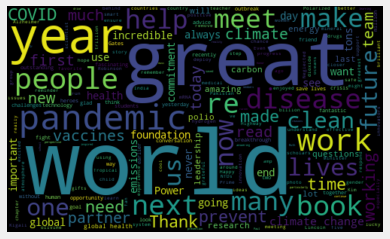

In [49]:
# Plot the WordCloud
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [50]:
# Create a Function to compute the Negative, Neutral , and Positive Analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [51]:
df

,Tweets,Subjectivity,Polarity,Analysis
0,"If you’re a big tennis fan like I am, ’s profi...",0.453333,0.276667,Positive
1,Prime Minister Abe was a friend and partner of...,0.266667,-0.233333,Negative
2,"Happy 10th birthday to CRISPR, one of the most...",0.833333,0.566667,Positive
3,. is one of my favorite storytellers. I was wo...,1.000000,0.500000,Positive
4,“It’s also a reminder that it’s not just about...,0.500000,0.000000,Neutral
...,...,...,...,...
95,I also had a chance to meet up with Gates Foun...,0.000000,0.000000,Neutral
96,What a day! I had a great time in London chatt...,0.602273,0.468182,Positive
97,"Thanks, for the thoughtful conversation. I al...",0.585714,0.303571,Positive
98,If we’re going to make COVID-19 the last pande...,0.066667,0.000000,Neutral


In [52]:
# Print all of the positive tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j + 1

1) If you’re a big tennis fan like I am, ’s profile on Althea Gibson is a grand slam. She was the first Black player to win Wimbledon. 

2) Happy 10th birthday to CRISPR, one of the most important inventions in medicine, biology, and agriculture. 

3) . is one of my favorite storytellers. I was wowed by his writing in The Lincoln Highway. 

4) I got to join the  team to talk about the incredible work they’re doing to accelerate climate innovation. I’m lucky to work with such smart and dedicated individuals. 

5) Today’s ruling makes it more challenging for the US to hit its climate goals. It’s now more important than ever for Congress to level the playing field for clean technologies.

6) Being in New York is always fun – you never know who you’ll run into. It was great meeting you and Namrata! 

7) Here’s progress worth celebrating. More people have bank accounts than ever before:  

8) It’s great to see countries and partners jointly sign the Kigali Declaration. It wouldn't have been

In [53]:
# Print the Negative
j = 1
sortedDF = df.sort_values(['Polarity'], ascending = 'False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j + 1

1) Prime Minister Abe was a friend and partner of our foundation who helped save lives around the world by championing universal health coverage and programs like the Global Fund. I’m shocked and saddened by his death.

2) Yesterday, I had a chance to spend the day focusing on climate – and the innovations that can prevent the very worst effects of climate change. 



<function matplotlib.pyplot.show>

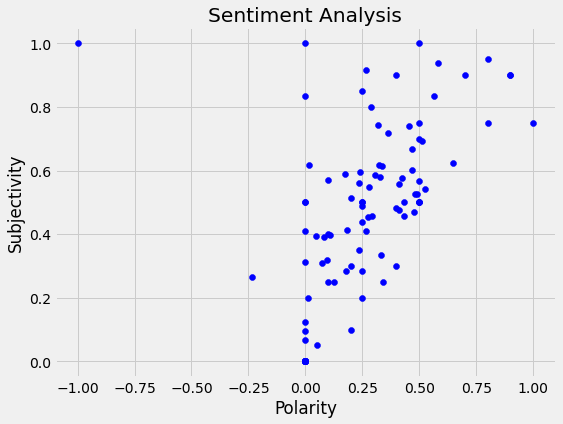

In [54]:
# Plot the Polarity and Subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show

In [55]:
# Get the Percentage of Positive Tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round( (ptweets.shape[0] / df.shape[0]) *100, 1) 

74.0

In [56]:
# Get the Percentage of Negative Tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round( (ntweets.shape[0] / df.shape[0]) *100, 1) 

2.0

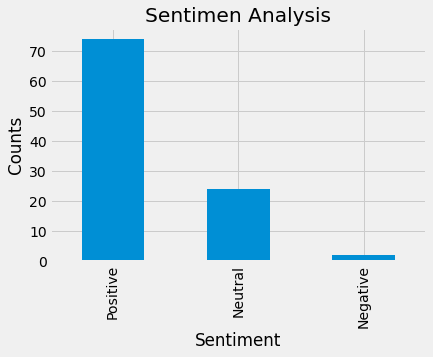

In [57]:
# Show the Value Counts
df['Analysis'].value_counts()

# Plot and Visualize the Counts
plt.title('Sentimen Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()